In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df1 = df.loc[:,'survived,pclass,sex,age,embarked,alone,fare'.split(',')].replace({'alone':{True:1,False:0}}).copy()
X = df1.drop(columns=['survived'])
y = df1['survived']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\46218132.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df.loc[:,'survived,pclass,sex,age,embarked,alone,fare'.split(',')].replace({'alone':{True:1,False:0}}).copy()


In [6]:
from feature_engine import encoding, imputation, scaling
from sklearn import pipeline, model_selection, preprocessing

In [7]:
titanic_pipeline=pipeline.Pipeline(
    [
    ('cat_impute',imputation.CategoricalImputer(imputation_method='frequent',variables=['embarked'])),
    ('cat',encoding.OneHotEncoder(variables=['sex','embarked'])),
    ('num_impute',imputation.MeanMedianImputer(imputation_method='median',variables=['age'])),
    ('scale',scaling.MeanNormalizationScaler(variables=['fare']))
    ]
)

In [8]:
X_train,X_test, y_train,y_test = model_selection.train_test_split(X,y,test_size=.2,random_state=42,stratify=y)

In [9]:
X_train = titanic_pipeline.fit_transform(X_train, y_train)


In [10]:
X_test = titanic_pipeline.transform(X_test)

In [11]:
X_train.head()

,pclass,age,alone,fare,sex_male,sex_female,embarked_S,embarked_C,embarked_Q
692,3,28.5,1,0.048164,1,0,1,0,0
481,2,28.5,1,-0.062108,1,0,1,0,0
527,1,28.5,1,0.370776,1,0,1,0,0
855,3,18.0,0,-0.043858,0,1,1,0,0
801,2,31.0,0,-0.010872,0,1,1,0,0


In [12]:
import pandas as pd

(
X_train
.assign(survived=y_train==1)
.corr(method='spearman')
.style
.background_gradient(cmap='RdBu',vmax=1, vmin=-1)

)

,pclass,age,alone,fare,sex_male,sex_female,embarked_S,embarked_C,embarked_Q,survived
pclass,1.000000,-0.308272,0.130877,-0.675508,0.144753,-0.144753,0.084777,-0.245589,0.223234,-0.345598
age,-0.308272,1.000000,0.148978,0.113000,0.052954,-0.052954,-0.019129,0.028825,-0.010895,-0.030962
alone,0.130877,0.148978,1.000000,-0.520667,0.320104,-0.320104,0.040432,-0.092443,0.069818,-0.215570
fare,-0.675508,0.113000,-0.520667,1.000000,-0.274454,0.274454,-0.085582,0.228681,-0.196788,0.342385
sex_male,0.144753,0.052954,0.320104,-0.274454,1.000000,-1.000000,0.138836,-0.100746,-0.081956,-0.549171
sex_female,-0.144753,-0.052954,-0.320104,0.274454,-1.000000,1.000000,-0.138836,0.100746,0.081956,0.549171
embarked_S,0.084777,-0.019129,0.040432,-0.085582,0.138836,-0.138836,1.000000,-0.804811,-0.472784,-0.179163
embarked_C,-0.245589,0.028825,-0.092443,0.228681,-0.100746,0.100746,-0.804811,1.000000,-0.142505,0.180029
embarked_Q,0.223234,-0.010895,0.069818,-0.196788,-0.081956,0.081956,-0.472784,-0.142505,1.000000,0.031501
survived,-0.345598,-0.030962,-0.215570,0.342385,-0.549171,0.549171,-0.179163,0.180029,0.031501,1.000000


In [13]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

In [14]:
rfc=ensemble.RandomForestClassifier(random_state=42)

In [15]:
param_grid = { 
    'n_estimators': [5, 10],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [16]:
cv_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)
cv_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 10]})

In [17]:
cv_rfc.best_score_

np.float64(0.824544469614892)

In [18]:
cv_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       random_state=42)

In [19]:
best_params=cv_rfc.best_params_

In [20]:
pd.DataFrame(cv_rfc.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.111259,0.052979,0.010198,0.003059,entropy,5,log2,10,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.804196,0.769231,0.880282,0.873239,0.795775,0.824544,0.044225,1
17,0.055450,0.011128,0.008466,0.004041,entropy,5,sqrt,10,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.804196,0.769231,0.880282,0.873239,0.795775,0.824544,0.044225,1
5,0.052554,0.019272,0.006991,0.002257,gini,5,sqrt,10,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.804196,0.762238,0.838028,0.866197,0.809859,0.816104,0.034849,3
7,0.073480,0.027887,0.009081,0.003086,gini,5,log2,10,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.804196,0.762238,0.838028,0.866197,0.809859,0.816104,0.034849,3
15,0.092160,0.053467,0.010224,0.001931,entropy,4,log2,10,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.832168,0.748252,0.845070,0.859155,0.781690,0.813267,0.041710,5
13,0.051286,0.001909,0.008807,0.001687,entropy,4,sqrt,10,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.832168,0.748252,0.845070,0.859155,0.781690,0.813267,0.041710,5
23,0.047172,0.003224,0.006924,0.000539,entropy,6,log2,10,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.804196,0.748252,0.838028,0.845070,0.823944,0.811898,0.034752,7
21,0.056888,0.012743,0.007451,0.002106,entropy,6,sqrt,10,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.804196,0.748252,0.838028,0.845070,0.823944,0.811898,0.034752,7
9,0.059037,0.012056,0.009744,0.002918,gini,6,sqrt,10,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.825175,0.748252,0.866197,0.830986,0.788732,0.811868,0.040191,9
11,0.076753,0.033188,0.015307,0.015559,gini,6,log2,10,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.825175,0.748252,0.866197,0.830986,0.788732,0.811868,0.040191,9


In [21]:
rfc_best = ensemble.RandomForestClassifier(**best_params ,random_state=42)

In [22]:
rfc_best.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       random_state=42)

In [23]:
rfc_best.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                        random_state=787846414),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                        random_state=996406378),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                        random_state=423734972),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                     

In [33]:
rfc_best.feature_names_in_

array(['pclass', 'age', 'alone', 'fare', 'sex_male', 'sex_female',
       'embarked_S', 'embarked_C', 'embarked_Q'], dtype=object)

In [34]:
rfc_best.classes_

array([0, 1])

[]

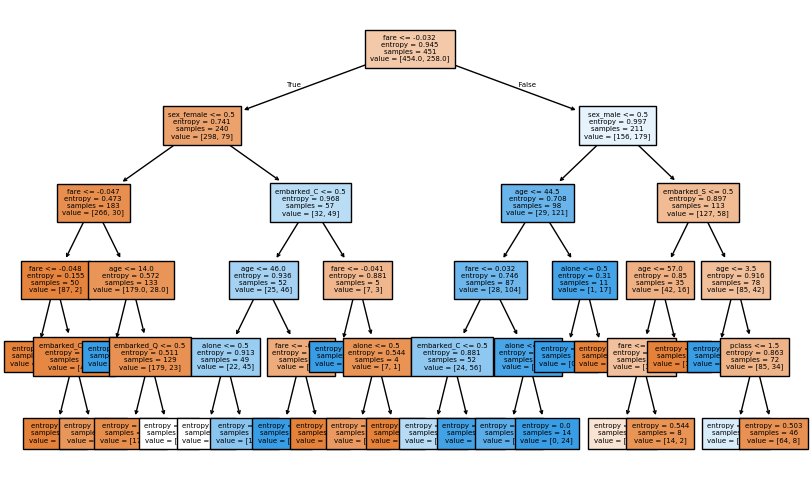

In [40]:
fig, ax = plt.subplots(figsize=(10,6))

tree.plot_tree(
    rfc_best.estimators_[0],
    feature_names=rfc_best.feature_names_in_, 
    filled=True,
    ax=ax,
    fontsize=5
    )

plt.plot()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x

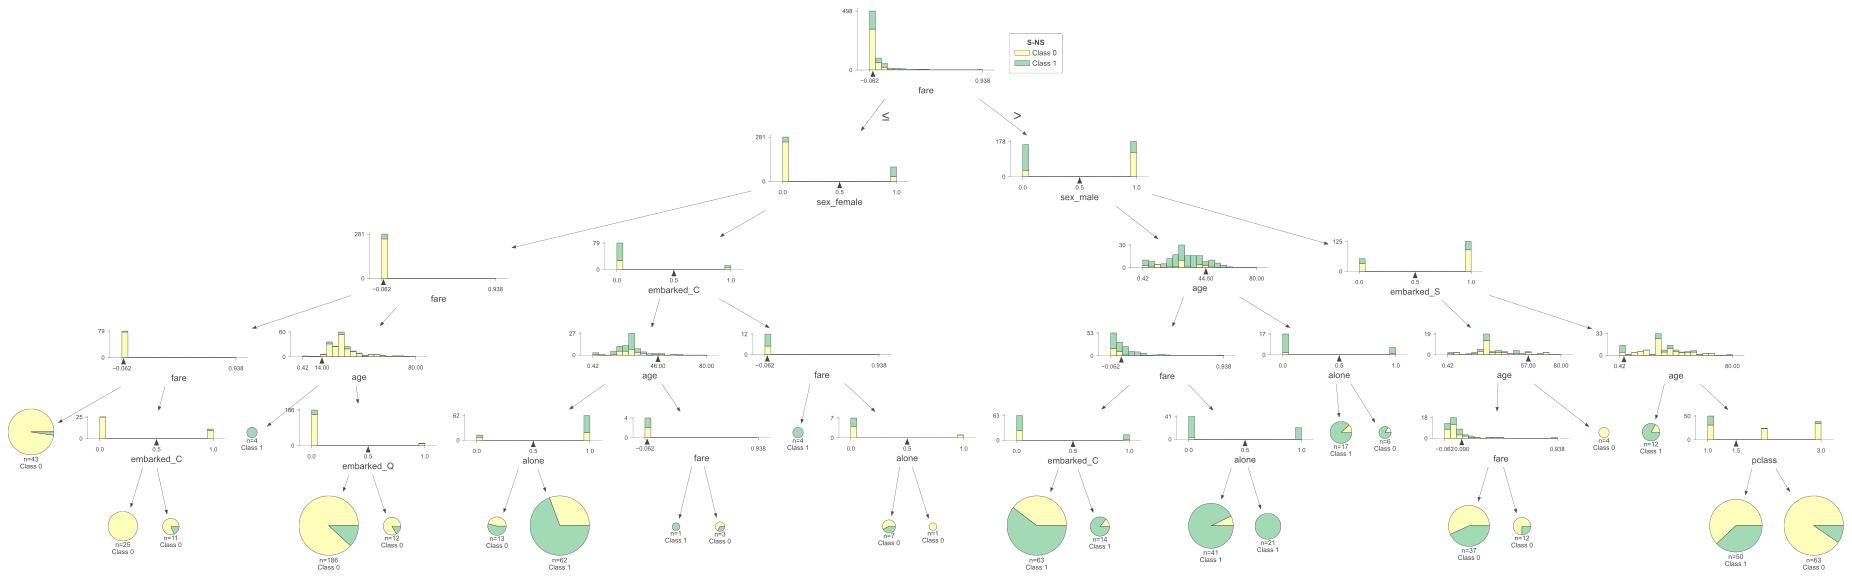

In [44]:
import dtreeviz

viz = dtreeviz.model(
    rfc_best.estimators_[0],
    X_train=X_train,
    y_train=y_train,
    target_name='S-NS',
    feature_names=rfc_best.feature_names_in_,
    #tree_index=0
)

viz.view()

In [47]:
rfc_best.estimators_[0].predict_proba(X_test)



c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names


array([[0.88888889, 0.11111111],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [0.90625   , 0.09375   ],
       [0.38983051, 0.61016949],
       [0.38983051, 0.61016949],
       [0.29090909, 0.70909091],
       [0.44680851, 0.55319149],
       [0.875     , 0.125     ],
       [0.88888889, 0.11111111],
       [0.5       , 0.5       ],
       [0.88888889, 0.11111111],
       [0.29090909, 0.70909091],
       [0.5625    , 0.4375    ],
       [0.44680851, 0.55319149],
       [1.        , 0.        ],
       [0.38983051, 0.61016949],
       [0.90625   , 0.09375   ],
       [1.        , 0.        ],
       [0.29090909, 0.70909091],
       [0.90625   , 0.09375   ],
       [0.38983051, 0.61016949],
       [0.90625   , 0.09375   ],
       [0.38983051, 0.61016949],
       [0.90625   , 0.09375   ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.44680851, 0.55319149],
       [0.90625   , 0.09375   ],
       [0.90625   , 0.09375   ],
       [0.

In [25]:
pred=rfc_best.predict(X_test)

In [26]:
from sklearn import metrics

In [50]:
for i in range(len(rfc_best.estimators_)):
    print(f'estimator {i} = {rfc_best.estimators_[i].score(X_test,y_test)}')


estimator 0 = 0.7150837988826816
estimator 1 = 0.7094972067039106
estimator 2 = 0.7597765363128491
estimator 3 = 0.7653631284916201
estimator 4 = 0.7653631284916201
estimator 5 = 0.7932960893854749
estimator 6 = 0.776536312849162
estimator 7 = 0.7821229050279329
estimator 8 = 0.776536312849162
estimator 9 = 0.7877094972067039


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTre

In [28]:
metrics.accuracy_score(y_test,pred)

0.7821229050279329

In [29]:
cm = metrics.confusion_matrix(y_test,pred)

In [30]:
cm

array([[102,   8],
       [ 31,  38]])

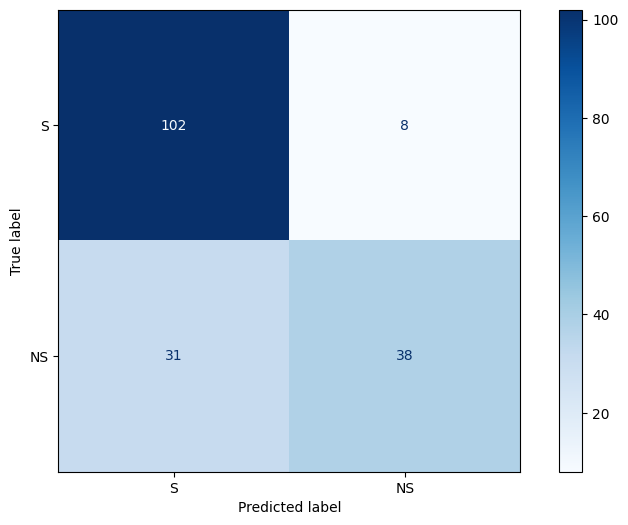

In [31]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(10,6))

metrics.ConfusionMatrixDisplay(
cm,display_labels=['S','NS']
).plot(ax=ax, cmap='Blues')

In [32]:
cm.

SyntaxError: invalid syntax (2395016005.py, line 1)